<h3>Name: Nguyen Van Hau <br> <br>
Student ID: 2111167 </h3>

# NLP Assignment: Sentiment Analysis - VLSP Dataset

## 1 Set up environment

### 1.1 For Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

NotImplementedError: Mounting drive is unsupported in this environment. Use PyDrive instead. See examples at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2.

### 1.2 For Kaggle

In [1]:
#Setup Gdrive file download extention 
!pip install gdown

Download train set/test set/word2vec model:

In [2]:
!gdown --id 1FiQSFJSiRBO_J4rYfZ94peoMv3x-Dup3 # vlsp_sentiment_train.csv
!gdown --id 1uruxz2CcconYmJNgGr_qL6t5nUwfkaST # vlsp_sentiment_test.csv
!gdown --id 1uCGz-aM9NgrF1d2hLcXeAkjoN9YqNO8j # vi-model-CBOW.bin

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FiQSFJSiRBO_J4rYfZ94peoMv3x-Dup3
To: /kaggle/working/vlsp_sentiment_train.csv
100%|█████████████████████████████████████████| 858k/858k [00:00<00:00, 123MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uruxz2CcconYmJNgGr_qL6t5nUwfkaST
To: /kaggle/working/vlsp_sentiment_test.csv
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 85.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be

### 1.3 Download neccessary libraries

In [3]:
!pip install underthesea
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 78.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 53.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14

**This is the solution for the tensorflow conflict on numpy 1.26.4, can skip if the below importing libraries are not got any error (don't run this at first)**

In [ ]:
# # 1. Uninstall everything (including hidden dependencies)
# !pip uninstall numpy tensorflow -y
# !pip install --upgrade --force-reinstall numpy==1.26.4

# # 2. Install TensorFlow 2.15 (latest stable version compatible with NumPy 1.26.4)
# !pip install tensorflow==2.15.0

# # 3. Restart the runtime (MUST DO THIS)
# import os
# os.kill(os.getpid(), 9)  # Force-restart

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━

### 1.4 Import libraries

In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from string import digits
from collections import Counter
from underthesea import word_tokenize
from gensim.models.word2vec import Word2Vec
from keras.utils import to_categorical
%matplotlib inline

2025-04-23 10:24:33.081321: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745403873.272391      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745403873.328653      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 1.5 Mount folder from drive to colab (skip if running on Kaggle or local environment)

In [4]:
!cp -r "/content/drive/MyDrive/HCMUT_POSTGRAD_242/Sentiment_Analysis" /content

In [5]:
%cd "/content/Sentiment_Analysis"

/content/Sentiment_Analysis


## 2 Implementation

### 2.1 Read the VLSP dataset

In [5]:
data_train = pd.read_csv("vlsp_sentiment_train.csv", sep='\t')
data_train.columns = ['Class', 'Data']
data_test = pd.read_csv("vlsp_sentiment_test.csv", sep='\t')
data_test.columns = ['Class', 'Data']

In [6]:
print(data_train.shape)
print(data_test.shape)

(5100, 2)
(1050, 2)


### 2.2 Data Preprocessing

In [7]:
labels = data_train.iloc[:, 0].values
reviews = data_train.iloc[:, 1].values

In [8]:
encoded_labels = []

for label in labels:
    if label == -1:
        encoded_labels.append([1,0,0])
    elif label == 0:
        encoded_labels.append([0,1,0])
    else:
        encoded_labels.append([0,0,1])

encoded_labels = np.array(encoded_labels)

In [9]:
reviews_processed = []
for review in reviews:
    review_cool_one = ''.join([char for char in review if char not in digits])
    reviews_processed.append(review_cool_one)

In [10]:
# Use Underthesea for Vietnamese word tokenizer
word_reviews = []
for review in reviews_processed:
    review = word_tokenize(review.lower())
    word_reviews.append(review)

In [11]:
EMBEDDING_DIM = 400 # how big is each word vector
MAX_VOCAB_SIZE = 10000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 300 # max number of words in a comment to use

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [13]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(word_reviews)
sequences_train = tokenizer.texts_to_sequences(word_reviews)
word_index = tokenizer.word_index

In [14]:
data = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
labels = encoded_labels

In [15]:
print('Shape of X train and X validation tensor:', data.shape)
print('Shape of label train and validation tensor:', labels.shape)

Shape of X train and X validation tensor: (5100, 300)
Shape of label train and validation tensor: (5100, 3)


In [16]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('vi-model-CBOW.bin', binary=True)

vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
print("vocab size", vocabulary_size)
for word, i in word_index.items():
    if i>=MAX_VOCAB_SIZE:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

vocab size 10000


I0000 00:00:1745403946.246010      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745403946.246673      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### CNN

In [17]:
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout,concatenate, SpatialDropout1D, BatchNormalization, GlobalMaxPool1D
from tensorflow.keras.layers import Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
sequence_length = data.shape[1]
filter_sizes = [4,6,8]
num_filters = 100
drop = 0.5

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
# reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv1D(num_filters, filter_sizes[0],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)
conv_1 = Conv1D(num_filters, filter_sizes[1],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)
conv_2 = Conv1D(num_filters, filter_sizes[2],activation='relu',kernel_regularizer=regularizers.l2(0.01))(embedding)

maxpool_0 = MaxPooling1D(sequence_length - filter_sizes[0] + 1, strides=1)(conv_0)
maxpool_1 = MaxPooling1D(sequence_length - filter_sizes[1] + 1, strides=1)(conv_1)
maxpool_2 = MaxPooling1D(sequence_length - filter_sizes[2] + 1, strides=1)(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)


# this creates a model that includes
model = Model(inputs, output)

adam = AdamW(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 300)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 300, 400)       │      4,000,000 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 297, 100)       │        160,100 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 295, 100)       │        240,100 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 293, 100)       │        320,100 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 1, 100)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 1, 100)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 1, 100)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 3, 100)         │              0 │ max_pooling1d[0][0],   │
│                           │                        │                │ max_pooling1d_1[0][0], │
│                           │                        │                │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 300)            │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 300)            │              0 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 3)              │            903 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,721,203 (18.01 MB)

 Trainable params: 4,721,203 (18.01 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
### IF YOU HAVE MODEL WEIGHT AND WANNA LOAD IT
model.load_weights("model.h5")

In [18]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

model.fit(data, labels, validation_split=0.1,
          epochs=20, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/20


I0000 00:00:1745403978.385381     123 service.cc:148] XLA service 0x7e876c00a5a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745403978.385873     123 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745403978.385891     123 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745403978.685008     123 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745403985.841933     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 737ms/step - accuracy: 0.3727 - loss: 26.0042 - val_accuracy: 0.8647 - val_loss: 16.5999
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5813 - loss: 15.7813 - val_accuracy: 0.2157 - val_loss: 11.7250
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.7094 - loss: 9.7152 - val_accuracy: 0.3373 - val_loss: 7.4077
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7786 - loss: 6.0984 - val_accuracy: 0.2471 - val_loss: 5.2598
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8162 - loss: 3.9998 - val_accuracy: 0.4824 - val_loss: 3.5181
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8331 - loss: 2.7996 - val_accuracy: 0.6843 - val_loss: 2.5088
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.8219 - loss: 2.1492 - val_accuracy: 0.1843 - val_loss: 2.8374
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8270 - loss: 1.7407 - val_accuracy: 0.5216 -

In [19]:
labels_test = data_test.iloc[:, 0].values
reviews_test = data_test.iloc[:, 1].values

In [20]:
encoded_labels_test = []

for label_test in labels_test:
    if label_test == -1:
        encoded_labels_test.append([1,0,0])
    elif label_test == 0:
        encoded_labels_test.append([0,1,0])
    else:
        encoded_labels_test.append([0,0,1])

encoded_labels_test = np.array(encoded_labels_test)

In [21]:
reviews_processed_test = []
for review_test in reviews_test:
    review_cool_one = ''.join([char for char in review_test if char not in digits])
    reviews_processed_test.append(review_cool_one)

In [22]:
# Use underthesea for Vietnamese word tokenizer
word_reviews_test = []
for review_test in reviews_processed_test:
    review_test = word_tokenize(review_test.lower())
    word_reviews_test.append(review_test)

In [23]:
sequences_test = tokenizer.texts_to_sequences(word_reviews_test)
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
labels_test = encoded_labels_test

In [24]:
print('Shape of X train and X validation tensor:',data_test.shape)
print('Shape of label train and validation tensor:', labels_test.shape)

Shape of X train and X validation tensor: (1050, 300)
Shape of label train and validation tensor: (1050, 3)


In [25]:
score = model.evaluate(data_test, labels_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6749 - loss: 1.3498


In [26]:
print("%s: %.2f" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 1.42
compile_metrics: 62.00%


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
True labels seem to be one-hot encoded. Converting to single dimension.

Accuracy: 0.6200

--- Averaged Metrics ---
Precision (Macro): 0.6545
Recall (Macro):    0.6200
F1-score (Macro):  0.5998
--------------------
Precision (Weighted): 0.6545
Recall (Weighted):    0.6200
F1-score (Weighted):  0.5998
--------------------

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       350
           1       0.78      0.34      0.47       350
           2       0.59      0.85      0.70       350

    accuracy                           0.62      1050
   macro avg       0.65      0.62      0.60      1050
weighted avg       0.65      0.62      0.60      1050


--- Confusion Matrix ---
[[234  20  96]
 [123 118 109]
 [ 37  14 299]]


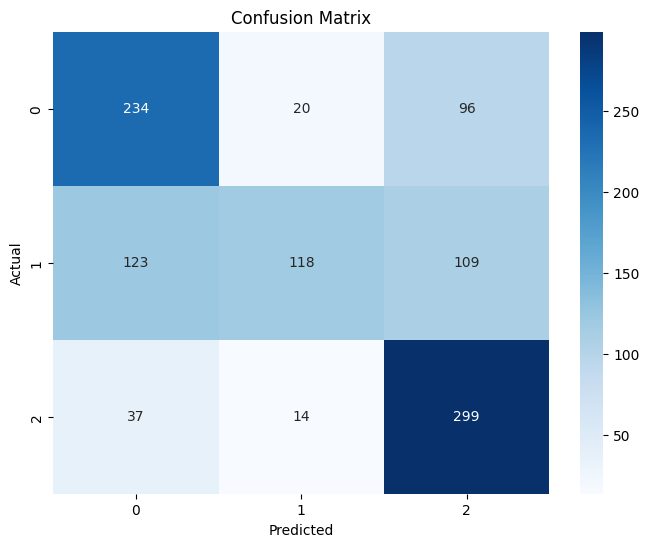

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns 
import matplotlib.pyplot as plt 

# 1. Get raw probability predictions from the model
y_pred_probabilities = model.predict(data_test)

# 2. Convert probabilities to class predictions (index of the highest probability)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# 3. Get true labels in the same format (if they are one-hot encoded)
# Check if labels_test is one-hot encoded (e.g., shape like [num_samples, 3])
if labels_test.ndim > 1 and labels_test.shape[1] > 1:
    print("True labels seem to be one-hot encoded. Converting to single dimension.")
    y_true = np.argmax(labels_test, axis=1)
else:
    # Assume labels_test is already a 1D array of class indices
    print("True labels seem to be single dimension.")
    y_true = labels_test # Use directly if already in the format [0, 1, 2, ...]

# --- Calculate and Print Metrics ---

# 4. Accuracy (should match model.evaluate if calculated the same way)
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 5. Precision, Recall, F1-score (Micro, Macro, Weighted Averages)
# 'macro': Calculate metrics for each label, and find their unweighted mean. Treats all classes equally.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). Accounts for class imbalance.
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives. Good overall measure.
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro') # Note: Micro P, R, F1 are all equal to accuracy for multi-class

print("\n--- Averaged Metrics ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")
print("-" * 20)
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")
print("-" * 20)
# Micro average is usually less informative for balanced datasets but included for completeness
# print(f"Precision (Micro): {precision_micro:.4f}")
# print(f"Recall (Micro):    {recall_micro:.4f}")
# print(f"F1-score (Micro):  {f1_micro:.4f}")


# 6. Classification Report (provides per-class metrics and averages)
print("\n--- Classification Report ---")
# You might need class names if you have them, otherwise it uses 0, 1, 2...
# target_names = ['class_0_name', 'class_1_name', 'class_2_name'] # Optional: Replace with your actual class names
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred)) # Without specific names


# 7. Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Optional: Plot Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # fmt='d' displays integers
            # xticklabels=target_names, yticklabels=target_names # Uncomment if you have target_names
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
%cd /content

/content


In [96]:
model.save_weights("model.h5")

In [ ]:
!cp model.h5 /content/drive/MyDrive